# Which building factors are key determinants of energy efficiency in Seattle's buildings？

## Introduction

The growing need for energy in urban areas and rising awareness of environmental sustainability have led to a focus on identifying key factors of building energy efficiency. In this study, we examine these factors in Seattle, a city known for its diverse buildings and commitment to sustainable development. We use the 2016 Building Energy Benchmarking dataset to analyze the effects of various building characteristics on energy efficiency, such as building type, primary property type, age, number of floors, total gross floor area, largest property use type gross floor area, ENERGY STAR score, site energy use intensity, and source energy use intensity. This research will inform urban planning and building design in Seattle and similar cities, promoting a more sustainable built environment.

## Literature Review

The unprecedented growth in global energy demand has presented a significant challenge to human life, as buildings and their associated construction activities contribute to at least 30% of greenhouse gas emissions (Royal Institution of Chartered Surveyors, 2005). The study underscores that various building types, such as industrial, commercial, and residential, exhibit distinct energy consumption patterns. This insight highlights the importance of understanding how specific design characteristics and features of buildings influence their energy performance.

Building density, too, plays a crucial role in determining energy efficiency. Rode et al. (2014) demonstrated that differences in building density can lead to varying levels of energy efficiency. This finding emphasizes the need to consider the spatial distribution of buildings in urban planning and energy efficiency strategies.

The use of energy performance indicators is another key aspect of evaluating and improving building energy efficiency. A study conducted in 2012 emphasized the importance of utilizing these indicators to identify trends and best practices for enhancing energy efficiency in the built environment(Mallory-Hill, Preiser and Watson, 2012).

Deng and Burnett (2000) explored the impact of building age on energy consumption by examining the relationship between the year of construction and energy consumption in Hong Kong hotels. Their findings highlight the significance of considering the age of buildings when addressing energy efficiency concerns.

However, the literature review reveals a gap in research regarding the extent to which these various factors influence energy consumption in buildings. Further investigation is needed to understand the interplay of these factors and their overall impact on building energy efficiency, paving the way for the development of more effective energy conservation strategies.

## Research question

To achieve Seattle's climate goals and transition towards a clean energy future, the city has implemented policies aimed at reducing building emissions by 27% by 2050, representing the most significant immediate action Seattle can undertake. Gaining a comprehensive understanding of the factors influencing building emissions and their contribution to energy consumption is crucial for managing Seattle's buildings and refining related energy policies. This study investigates the key determinants of building type, primary property type, building age, building size, and energy performance metrics by employing multiple linear regression and regression tree analyses.

Eight independent variables that best represent these five dimensions—Building Type, Primary Property Type, Year Built, Number of Floors, Property GFA Total, Largest Property Use Type GFA, ENERGYSTAR Score, Site EUI, and Source EUI—were examined to unveil their relationship with energy consumption (Site Energy Use). This research aims to provide valuable insights into how these factors impact energy consumption in Seattle buildings, ultimately informing policy-making and management strategies for a more sustainable urban environment.

## Presentation of data

In this analysis we will use the *2016 Building Energy Benchmarking* Dataset from the Seattle Open Database. In this dataset, which covers energy performance metrics for non-residential and multi-family buildings (20,000 square feet or larger) in Seattle, we will use the Building Type, Primary Property Type, Built age, NumberofFloors, Property GFA Total, Largest Property Use Type GFA, ENERGYSTAR Score, Site EUI, Source EUI, and Site Energy Use are analysed below.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Data Loading and Exploration

In [96]:
# read data into a DataFrame
building_energy = pd.read_csv('https://raw.githubusercontent.com/Yuying-Zeng/Data-Science-For-Spatial-Systemes/main/2016_Building_Energy_Benchmarking.csv')
building_energy.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


### Cleaning the dataset

In [97]:
# Select the specified columns
columns_to_keep = [
    "BuildingType",
    "PrimaryPropertyType",
    "YearBuilt",
    "NumberofFloors",
    "PropertyGFATotal",
    "LargestPropertyUseTypeGFA",
    "ENERGYSTARScore",
    "SiteEUI(kBtu/sf)",
    "SourceEUI(kBtu/sf)",
    "Latitude",
    "Longitude",
    "SiteEnergyUse(kBtu)"
]

building_energy = building_energy[columns_to_keep]

# Display the modified dataset
building_energy.head()

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),Latitude,Longitude,SiteEnergyUse(kBtu)
0,NonResidential,Hotel,1927,12,88434,88434.0,60.0,81.699997,182.500000,47.61220,-122.33799,7226362.5
1,NonResidential,Hotel,1996,11,103566,83880.0,61.0,94.800003,176.100006,47.61317,-122.33393,8387933.0
2,NonResidential,Hotel,1969,41,956110,756493.0,43.0,96.000000,241.899994,47.61393,-122.33810,72587024.0
3,NonResidential,Hotel,1926,10,61320,61320.0,56.0,110.800003,216.199997,47.61412,-122.33664,6794584.0
4,NonResidential,Hotel,1980,18,175580,123445.0,75.0,114.800003,211.399994,47.61375,-122.34047,14172606.0


In [98]:
# Calculate the building age
building_energy['BuildingAge'] = 2016 - building_energy['YearBuilt']
# Remove unnecessary columns
building_energy = building_energy.drop(['YearBuilt'], axis=1)
building_energy.head()

,BuildingType,PrimaryPropertyType,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),Latitude,Longitude,SiteEnergyUse(kBtu),BuildingAge
0,NonResidential,Hotel,12,88434,88434.0,60.0,81.699997,182.500000,47.61220,-122.33799,7226362.5,89
1,NonResidential,Hotel,11,103566,83880.0,61.0,94.800003,176.100006,47.61317,-122.33393,8387933.0,20
2,NonResidential,Hotel,41,956110,756493.0,43.0,96.000000,241.899994,47.61393,-122.33810,72587024.0,47
3,NonResidential,Hotel,10,61320,61320.0,56.0,110.800003,216.199997,47.61412,-122.33664,6794584.0,90
4,NonResidential,Hotel,18,175580,123445.0,75.0,114.800003,211.399994,47.61375,-122.34047,14172606.0,36


In [99]:
# View null values in a dataset
building_energy.isnull().sum()

BuildingType                   0
PrimaryPropertyType            0
NumberofFloors                 0
PropertyGFATotal               0
LargestPropertyUseTypeGFA     20
ENERGYSTARScore              843
SiteEUI(kBtu/sf)               7
SourceEUI(kBtu/sf)             9
Latitude                       0
Longitude                      0
SiteEnergyUse(kBtu)            5
BuildingAge                    0
dtype: int64

In [100]:
# Handle missing values
building_energy.dropna(axis=0, inplace=True)
building_energy.isnull().sum()

BuildingType                 0
PrimaryPropertyType          0
NumberofFloors               0
PropertyGFATotal             0
LargestPropertyUseTypeGFA    0
ENERGYSTARScore              0
SiteEUI(kBtu/sf)             0
SourceEUI(kBtu/sf)           0
Latitude                     0
Longitude                    0
SiteEnergyUse(kBtu)          0
BuildingAge                  0
dtype: int64

In [101]:
building_energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2526 entries, 0 to 3371
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BuildingType               2526 non-null   object 
 1   PrimaryPropertyType        2526 non-null   object 
 2   NumberofFloors             2526 non-null   int64  
 3   PropertyGFATotal           2526 non-null   int64  
 4   LargestPropertyUseTypeGFA  2526 non-null   float64
 5   ENERGYSTARScore            2526 non-null   float64
 6   SiteEUI(kBtu/sf)           2526 non-null   float64
 7   SourceEUI(kBtu/sf)         2526 non-null   float64
 8   Latitude                   2526 non-null   float64
 9   Longitude                  2526 non-null   float64
 10  SiteEnergyUse(kBtu)        2526 non-null   float64
 11  BuildingAge                2526 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 256.5+ KB


In [102]:
# print a few rows of this dataset
building_energy.head(10)

,BuildingType,PrimaryPropertyType,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),Latitude,Longitude,SiteEnergyUse(kBtu),BuildingAge
0,NonResidential,Hotel,12,88434,88434.0,60.0,81.699997,182.500000,47.61220,-122.33799,7226362.5,89
1,NonResidential,Hotel,11,103566,83880.0,61.0,94.800003,176.100006,47.61317,-122.33393,8387933.0,20
2,NonResidential,Hotel,41,956110,756493.0,43.0,96.000000,241.899994,47.61393,-122.33810,72587024.0,47
3,NonResidential,Hotel,10,61320,61320.0,56.0,110.800003,216.199997,47.61412,-122.33664,6794584.0,90
4,NonResidential,Hotel,18,175580,123445.0,75.0,114.800003,211.399994,47.61375,-122.34047,14172606.0,36
6,NonResidential,Hotel,11,83008,81352.0,27.0,70.800003,146.600006,47.61390,-122.33283,5758795.0,90
8,NonResidential,Hotel,15,163984,163984.0,43.0,83.699997,180.899994,47.60294,-122.33263,13723820.0,112
9,Multifamily MR (5-9),Mid-Rise Multifamily,6,63712,56132.0,1.0,81.500000,182.699997,47.60284,-122.33184,4573777.0,106
10,NonResidential,Hotel,11,153163,133884.0,30.0,119.599998,228.199997,47.60695,-122.33414,16016644.0,47
11,NonResidential,Hotel,25,333176,336640.0,36.0,80.000000,199.000000,47.60713,-122.33323,26941110.0,18


In [103]:
building_energy.count()

BuildingType                 2526
PrimaryPropertyType          2526
NumberofFloors               2526
PropertyGFATotal             2526
LargestPropertyUseTypeGFA    2526
ENERGYSTARScore              2526
SiteEUI(kBtu/sf)             2526
SourceEUI(kBtu/sf)           2526
Latitude                     2526
Longitude                    2526
SiteEnergyUse(kBtu)          2526
BuildingAge                  2526
dtype: int64

### Data pre-processing

We use the dataset with latitude and longitude (building_energy) for geovisual analysis and a new dataset with latitude and longitude removed (building_energy_new) for data analysis.

In [104]:
# Remove the latitude and longitude columns create a new dataset
building_energy_new = building_energy.drop(['Latitude','Longitude'], axis=1)

In [105]:
# Label encoding using sklearn
le_building_type = LabelEncoder()
le_primary_property_type = LabelEncoder()

building_energy_new['BuildingType'] = le_building_type.fit_transform(building_energy_new['BuildingType'])
building_energy_new['PrimaryPropertyType'] = le_primary_property_type.fit_transform(building_energy_new['PrimaryPropertyType'])

In [106]:
building_energy_new.head(5)

,BuildingType,PrimaryPropertyType,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),BuildingAge
0,4,3,12,88434,88434.0,60.0,81.699997,182.500000,7226362.5,89
1,4,3,11,103566,83880.0,61.0,94.800003,176.100006,8387933.0,20
2,4,3,41,956110,756493.0,43.0,96.000000,241.899994,72587024.0,47
3,4,3,10,61320,61320.0,56.0,110.800003,216.199997,6794584.0,90
4,4,3,18,175580,123445.0,75.0,114.800003,211.399994,14172606.0,36


### Data synthesis and analysis

Geographical visualisation of data

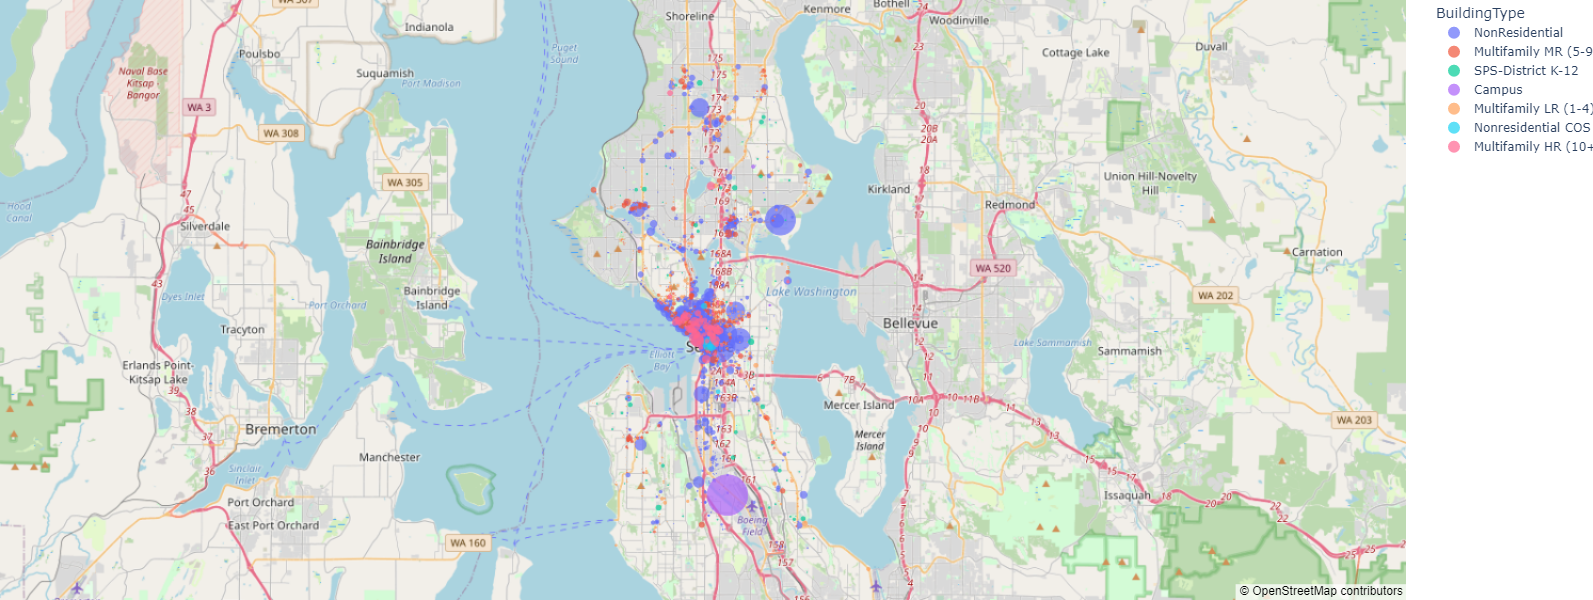

In [107]:
import plotly.express as px
fig = px.scatter_mapbox(building_energy, lat="Latitude", lon="Longitude", hover_name="ENERGYSTARScore", hover_data=["PrimaryPropertyType", "BuildingAge", "NumberofFloors"], zoom=10, height=600,color="BuildingType", size="SiteEnergyUse(kBtu)",
                  color_continuous_scale=px.colors.cyclical, size_max=30)
#color_discrete_sequence=["green"]
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

The geographic visualization shows that the large energy consuming buildings are concentrated in the downtown Seattle location, and the large energy consuming building types are predominantly nonresidential.

Exploratory Data Analysis (EDA)

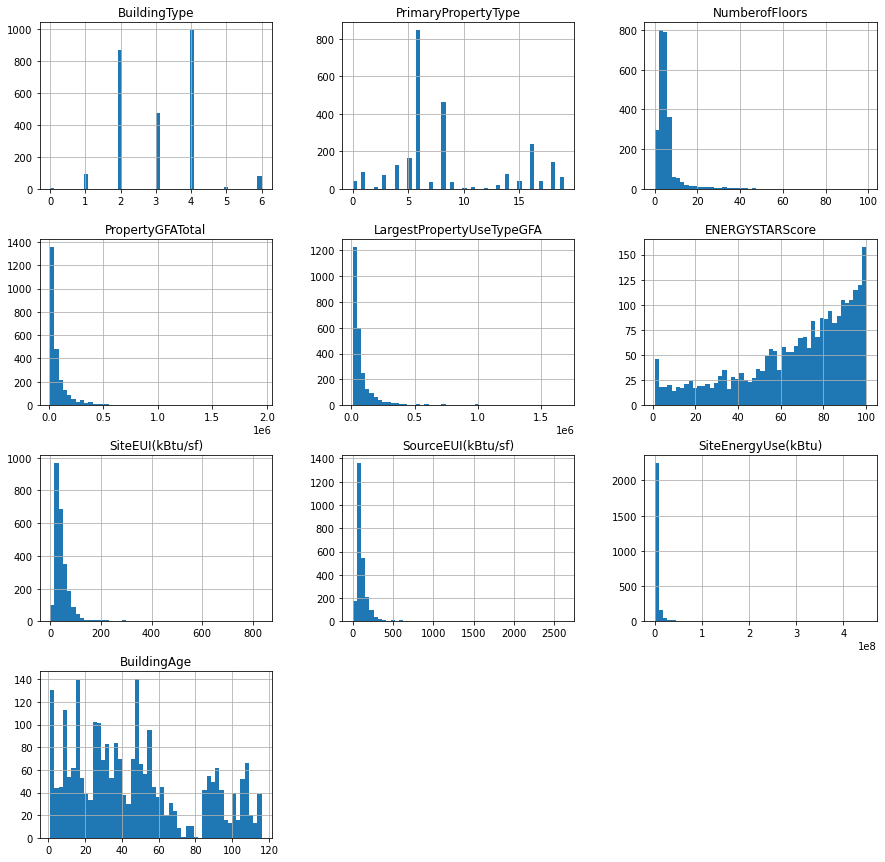

In [108]:
# Visualize the distribution of variables using histograms and density plots.
# Histograms
building_energy_new.hist(figsize=(15, 15), bins=50)
plt.show()

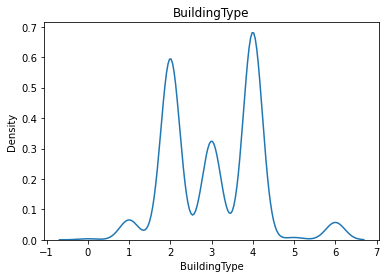

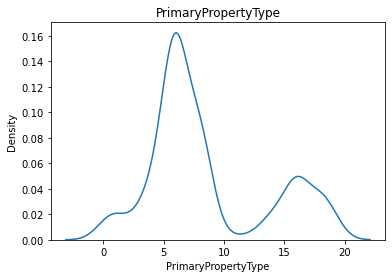

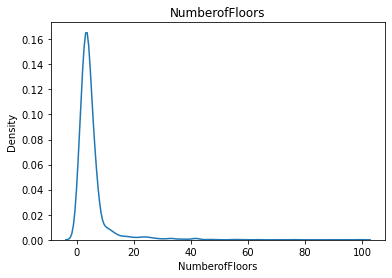

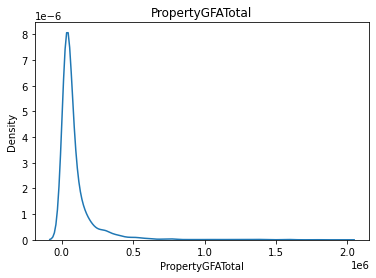

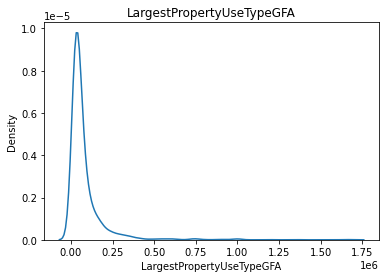

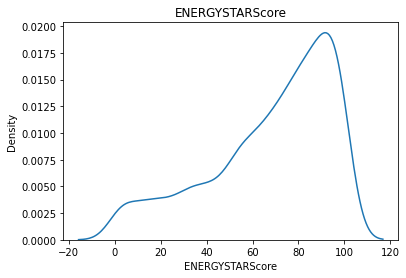

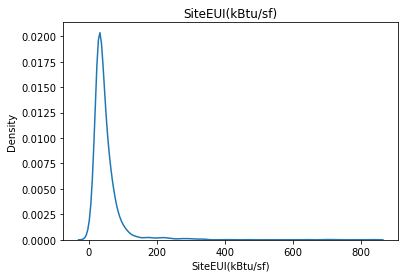

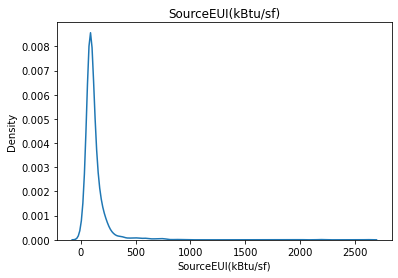

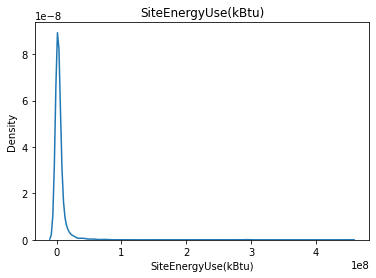

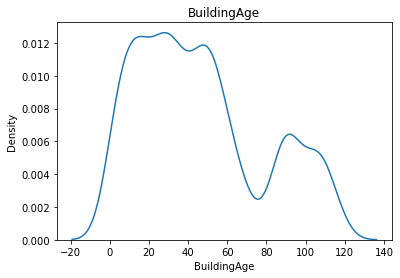

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numeric_columns by filtering the columns of the DataFrame
numeric_columns = building_energy_new.select_dtypes(include=['number']).columns

# Density plots
for col in numeric_columns:
    sns.kdeplot(building_energy_new[col])
    plt.title(col)
    plt.show()

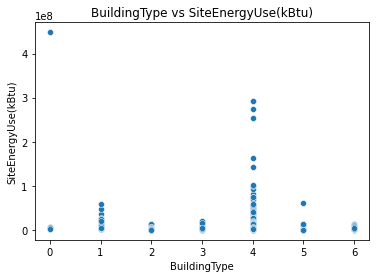

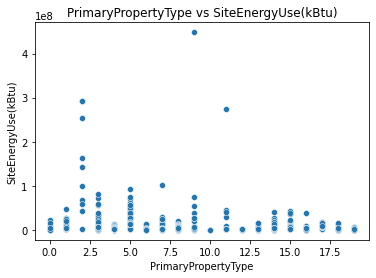

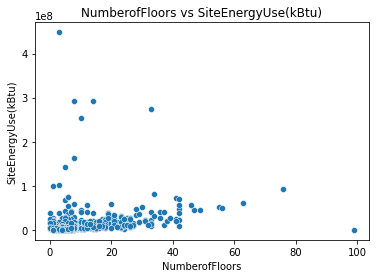

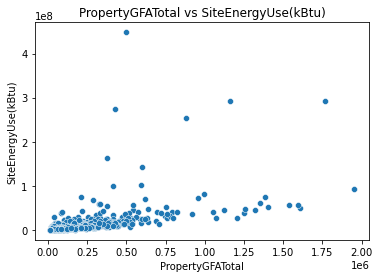

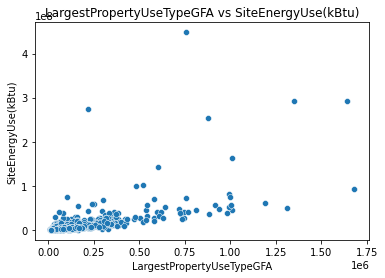

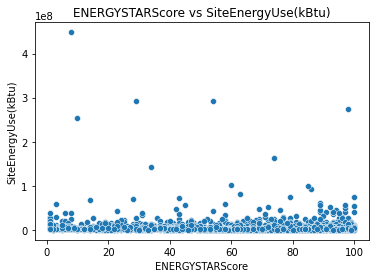

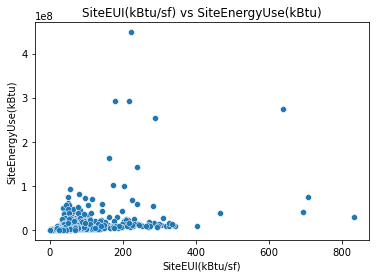

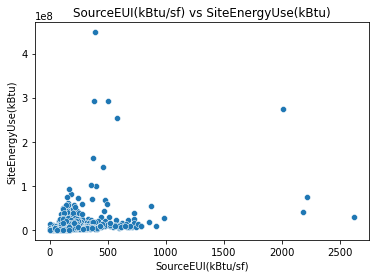

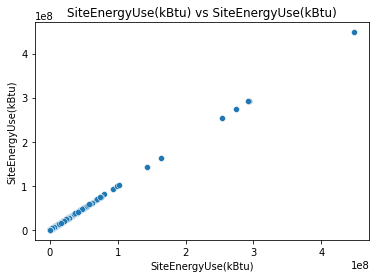

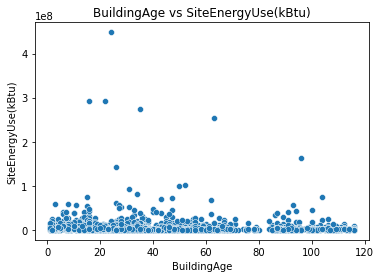

In [110]:
# Scatterplots
for col in numeric_columns:
    sns.scatterplot(data=building_energy_new, x=col, y='SiteEnergyUse(kBtu)')
    plt.title(f"{col} vs SiteEnergyUse(kBtu)")
    plt.show()


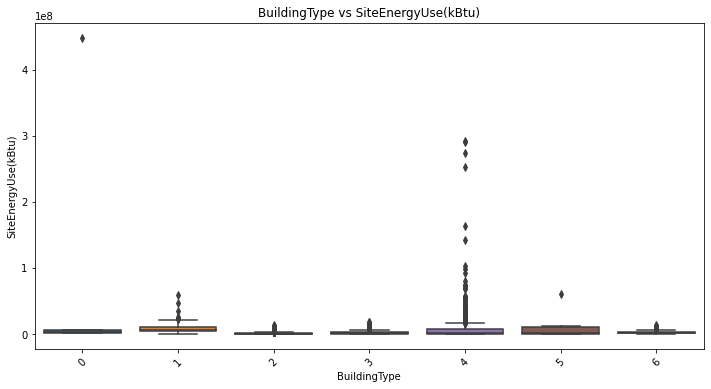

In [111]:
# Box plot for BuildingType
plt.figure(figsize=(12, 6))
sns.boxplot(data=building_energy_new, x='BuildingType', y='SiteEnergyUse(kBtu)')
plt.xticks(rotation=45)
plt.title("BuildingType vs SiteEnergyUse(kBtu)")
plt.show()

In [112]:
print(building_energy_new.columns)

Index(['BuildingType', 'PrimaryPropertyType', 'NumberofFloors',
       'PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'BuildingAge'],
      dtype='object')


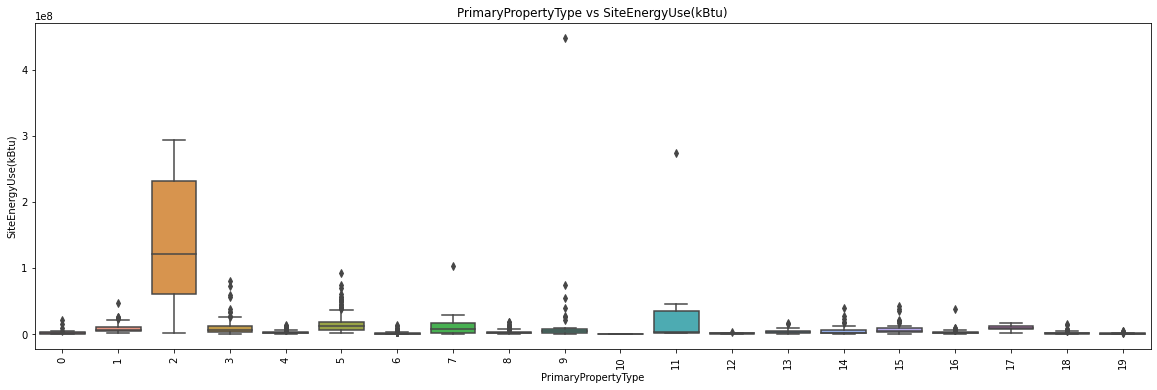

In [113]:
# Box plot for PrimaryPropertyType
plt.figure(figsize=(20, 6))
sns.boxplot(data=building_energy_new, x='PrimaryPropertyType', y='SiteEnergyUse(kBtu)')
plt.xticks(rotation=90)
plt.title("PrimaryPropertyType vs SiteEnergyUse(kBtu)")
plt.show()

In [114]:
building_energy_new.head(5)

,BuildingType,PrimaryPropertyType,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),BuildingAge
0,4,3,12,88434,88434.0,60.0,81.699997,182.500000,7226362.5,89
1,4,3,11,103566,83880.0,61.0,94.800003,176.100006,8387933.0,20
2,4,3,41,956110,756493.0,43.0,96.000000,241.899994,72587024.0,47
3,4,3,10,61320,61320.0,56.0,110.800003,216.199997,6794584.0,90
4,4,3,18,175580,123445.0,75.0,114.800003,211.399994,14172606.0,36


In [115]:
#from sklearn.preprocessing import StandardScaler

# Standardize numeric features
#numeric_columns = ['BuildingAge', 'NumberofFloors', 'PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)']
#scaler = StandardScaler()
#building_energy_new[numeric_columns] = scaler.fit_transform(building_energy_new[numeric_columns])


In [116]:
print(building_energy_new.columns)

Index(['BuildingType', 'PrimaryPropertyType', 'NumberofFloors',
       'PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'BuildingAge'],
      dtype='object')


In [117]:
# split the dataset into training and testing sets.
X = building_energy_new.drop('SiteEnergyUse(kBtu)', axis=1)
y = building_energy_new['SiteEnergyUse(kBtu)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
building_energy_new.describe()

,BuildingType,PrimaryPropertyType,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),BuildingAge
count,2526.000000,2526.000000,2526.000000,2.526000e+03,2.526000e+03,2526.000000,2526.000000,2526.000000,2.526000e+03,2526.000000
mean,3.076010,8.500396,5.104513,9.655821e+04,8.096743e+04,67.969913,49.553880,123.570428,5.058104e+06,46.093824
std,1.101108,4.940417,6.047089,1.517926e+05,1.234078e+05,26.853410,48.592935,128.699561,1.675020e+07,32.206344
min,0.000000,0.000000,0.000000,1.229400e+04,8.061000e+03,1.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,2.000000,6.000000,3.000000,2.989000e+04,2.693275e+04,53.000000,27.799999,74.500000,9.518356e+05,19.000000
50%,3.000000,6.000000,4.000000,4.650600e+04,4.287600e+04,75.000000,36.950001,93.400002,1.802373e+06,40.000000
75%,4.000000,11.000000,6.000000,9.575025e+04,8.259875e+04,90.000000,55.400002,131.149998,4.135558e+06,63.000000
max,6.000000,19.000000,99.000000,1.952220e+06,1.680937e+06,100.000000,834.400024,2620.000000,4.483853e+08,116.000000


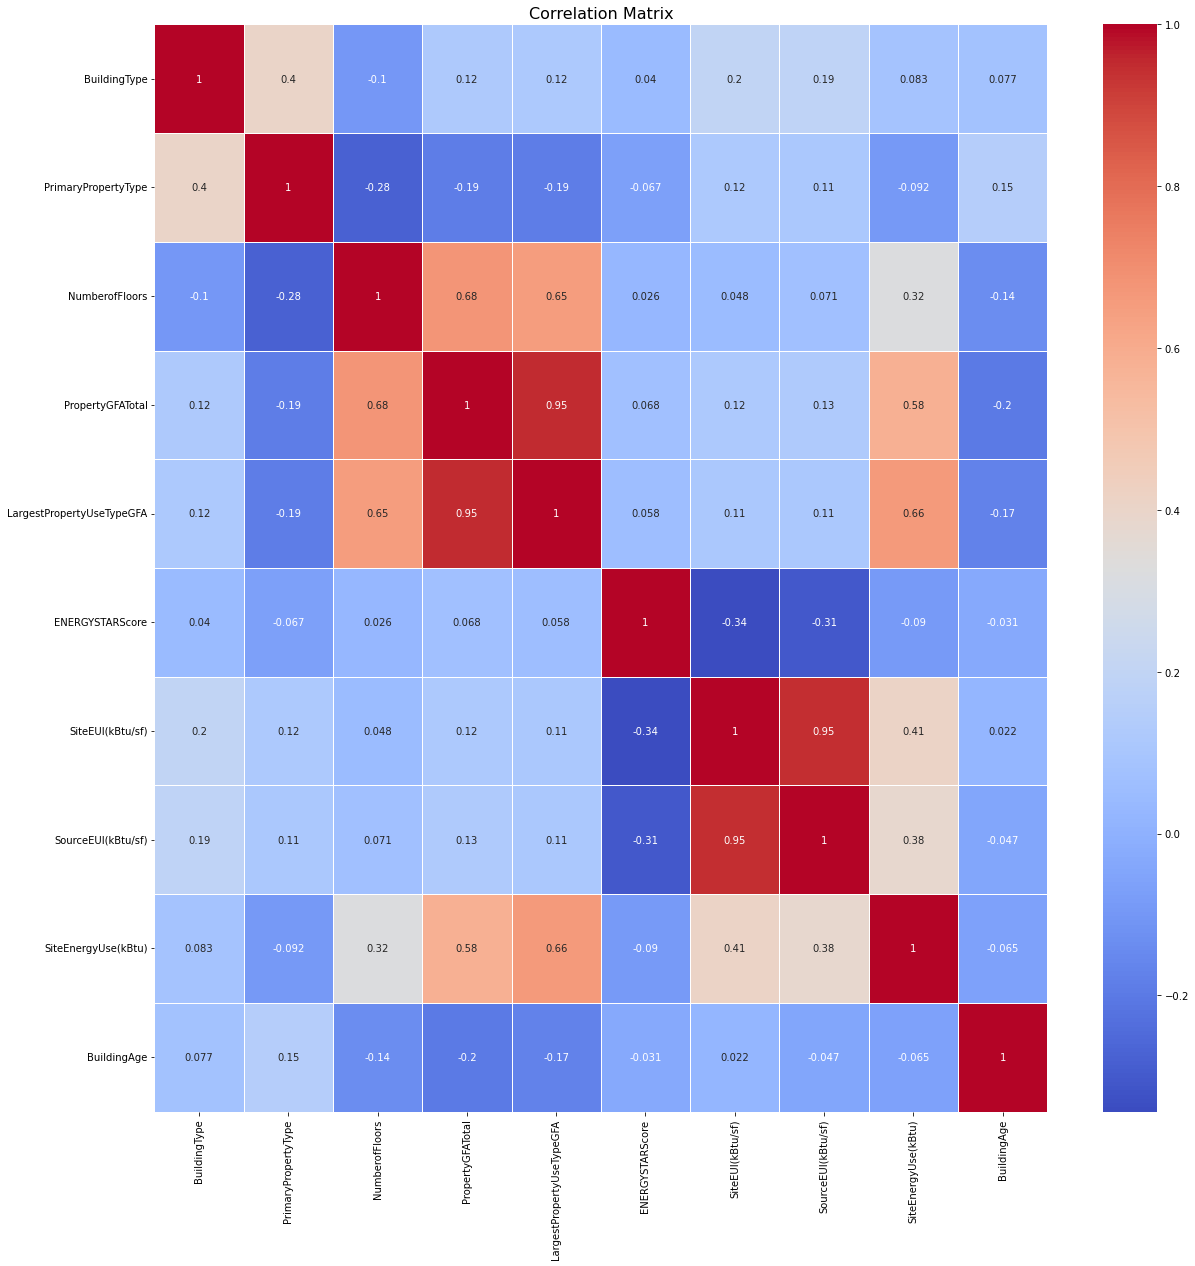

In [119]:
# Correlation matrix
correlations = building_energy_new.corr()

# Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

## Methodology

### Stepwise Regression

We started with a stepwise regression model for variable selection to find the best subset of predictor variables for the model. In the stepwise regression model we chose the backward elimination method, which starts with a complete model containing all predictor variables. At each step, the least significant variables (i.e. those with the highest p-values or those that contribute least to the model) are removed. This process continues until all remaining variables in the model are significant.

In [120]:
# Initialize the list of included predictor variables
def stepwise_regression(X, y, p_enter=0.05, p_remove=0.05):
    included = []
# Run the stepwise regression until no changes are made in forward selection or backward elimination
    while True:
        changed = False
        
        # Forward selection
        # Find the excluded predictor variables
        excluded = list(set(X.columns) - set(included))
        
        # Calculate p-values for each excluded variable when added to the model
        new_pval = pd.Series(dtype=float, index=excluded)
        for col in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [col]]))).fit()
            new_pval[col] = model.pvalues[col]
        min_pval = new_pval.min()
        
        # Find the minimum p-value and check if it's less than the threshold for entering the model
        if min_pval < p_enter:
            # Add the variable with the lowest p-value to the list of included variables
            included.append(new_pval.idxmin())
            changed = True

        # Backward elimination
        # Fit the model with the current list of included predictor variables
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # Get the p-values for the included predictor variables (excluding the constant)
        pvalues = model.pvalues.iloc[1:]
        max_pval = pvalues.max()
        if max_pval > p_remove:
            excluded_feature = pvalues.idxmax()
            included.remove(excluded_feature)
            changed = True
# If no changes were made in this iteration, break the loop and return the final list of included variables
        if not changed:
            break

    return included

In [121]:
import statsmodels.api as sm

In [122]:
# Remove the response variable from the predictors dataset
predictors_data = building_energy_new.drop(columns=['SiteEnergyUse(kBtu)'], axis=1)
# Extract the response variable from the dataset
response_data = building_energy_new[['SiteEnergyUse(kBtu)']]

In [123]:
# Run the stepwise regression on the predictors and response data
list_predictor_select_stepwise = stepwise_regression(X=predictors_data, y=response_data)
# Print the list of predictor variables selected by the stepwise regression
print("The predictors that are selected by stepwise regression are:")
print(list_predictor_select_stepwise)

The predictors that are selected by stepwise regression are:
['LargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)', 'PropertyGFATotal', 'NumberofFloors', 'BuildingType', 'BuildingAge']


In [124]:
# View the original column
print(building_energy_new.columns)

Index(['BuildingType', 'PrimaryPropertyType', 'NumberofFloors',
       'PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'BuildingAge'],
      dtype='object')


By comparing the original columns we found that PrimaryPropertyType, NumberofFloors, PropertyGFATotal, ENERGYSTARScore, and SourceEUI(kBtu/sf) were removed, leaving the variables with the greatest impact on the energy use of Seattle buildings.

In [125]:
import statsmodels.formula.api as smf
# Define the formula for the multiple linear regression model
# The dependent variable is 'SiteEnergyUse(kBtu)', and the predictor variables are selected by stepwise regression
formula = 'Q("SiteEnergyUse(kBtu)") ~ LargestPropertyUseTypeGFA + Q("SiteEUI(kBtu/sf)") + PropertyGFATotal + NumberofFloors + BuildingType + BuildingAge'
multi_regression_model_1 = smf.ols(formula=formula, data=building_energy_new).fit()
print(multi_regression_model_1.summary())

                               OLS Regression Results                               
Dep. Variable:     Q("SiteEnergyUse(kBtu)")   R-squared:                       0.589
Model:                                  OLS   Adj. R-squared:                  0.588
Method:                       Least Squares   F-statistic:                     602.7
Date:                      Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                              23:29:11   Log-Likelihood:                -44477.
No. Observations:                      2526   AIC:                         8.897e+04
Df Residuals:                          2519   BIC:                         8.901e+04
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

The multiple linear regression model explained approximately 58.9% of the variance in SiteEnergyUse (kBtu) and all predictor variables were statistically significant. However, the assumption of normality of the residuals is violated and there may be problems with multicollinearity. Further diagnostics or transformations need to be considered to address these issues and improve the performance of the model.

Use the correlation matrix or variance inflation factor (VIF) to check for multicollinearity between the independent variables.

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif_(df, thresh=5):
    '''
    Calculates VIF for each feature in a pandas dataframe
    A constant must be added to variance_inflation_factor or the results will be incorrect
    :param df: the pandas dataframe containing only the predictor features, not the target variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with features removed
    '''
    # Add a constant to the dataframe
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    # Calculate VIF for each feature and store in a dataframe
    vif_df = pd.Series([variance_inflation_factor(const.values, i) for i in range(const.shape[1])], index=const.columns).to_frame()
    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
     # Identify features with VIF above the threshold
    vif_df = vif_df[vif_df['VIF'] > thresh]
    
    # Print the features with VIF above the threshold
    print('Features above VIF threshold:\n')
    print(vif_df[vif_df['VIF'] > thresh])
    
    # Remove features with VIF above the threshold from the original dataframe
    col_to_drop = list(vif_df.index)
    for i in col_to_drop:
        print('Dropping: {}'.format(i))
        df = df.drop(columns=i)
    return df

In [127]:
# Calculate VIF and filter predictor variables
df_predictors_select_VIF = calculate_vif_(predictors_data)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Features above VIF threshold:

                                 VIF
PropertyGFATotal           10.977481
SiteEUI(kBtu/sf)           10.290254
LargestPropertyUseTypeGFA  10.096837
SourceEUI(kBtu/sf)         10.020049
Dropping: PropertyGFATotal
Dropping: SiteEUI(kBtu/sf)
Dropping: LargestPropertyUseTypeGFA
Dropping: SourceEUI(kBtu/sf)
The columns remaining after VIF selection are:
Index(['BuildingType', 'PrimaryPropertyType', 'NumberofFloors',
       'ENERGYSTARScore', 'BuildingAge'],
      dtype='object')


In [128]:
from sklearn.linear_model import LinearRegression
# Instantiate and fit the linear regression model using filtered predictor variables
lr = LinearRegression()
lr.fit(X=df_predictors_select_VIF, y=response_data)

LinearRegression()

In [129]:
# Apply VIF filtering
X_vif_filtered = calculate_vif_(X, thresh=5)

# Fit the linear regression model
lr.fit(X_vif_filtered, y)

# Print the intercept and coefficients
print("Intercept:", lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": X_vif_filtered.columns.values, "coef": lr.coef_})
print(df_coef_lr_VIF)

Features above VIF threshold:

                                 VIF
PropertyGFATotal           10.977481
SiteEUI(kBtu/sf)           10.290254
LargestPropertyUseTypeGFA  10.096837
SourceEUI(kBtu/sf)         10.020049
Dropping: PropertyGFATotal
Dropping: SiteEUI(kBtu/sf)
Dropping: LargestPropertyUseTypeGFA
Dropping: SourceEUI(kBtu/sf)
Intercept: 894698.8917334387
                   var          coef
0         BuildingType  2.263112e+06
1  PrimaryPropertyType -2.295493e+05
2       NumberofFloors  8.694586e+05
3      ENERGYSTARScore -6.842663e+04
4          BuildingAge -1.375239e+04


In [130]:
# Calculate and print the R-squared score of the linear regression model
lr.score(X=df_predictors_select_VIF, y=response_data)

0.13020901995896295

In [131]:
# Add a constant term to the predictor features
X_with_constant = sm.add_constant(X)

# Fit the OLS model and get the results object
regressor_OLS = sm.OLS(endog=y, exog=X_with_constant).fit()

# Print the summary
print(regressor_OLS.summary())

                             OLS Regression Results                            
Dep. Variable:     SiteEnergyUse(kBtu)   R-squared:                       0.590
Model:                             OLS   Adj. R-squared:                  0.588
Method:                  Least Squares   F-statistic:                     401.9
Date:                 Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                         23:29:11   Log-Likelihood:                -44476.
No. Observations:                 2526   AIC:                         8.897e+04
Df Residuals:                     2516   BIC:                         8.903e+04
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

We fit the OLS model again with the remaining variables after VIF and from the results obtained we can see that about 59% of the variation in the dependent variable (SiteEnergyUse(kBtu)) can be explained by the predictor variables in the model. However, we found that some variables (e.g., "PrimaryPropertyType", "ENERGYSTARScore" and "SourceEUI(kBtu/ sf)) have high p-values, implying that they may not be statistically significant predictors of "SiteEnergyUse(kBtu)".

### Lasso

We used Lasso regression to see the relationship between the respective variables and the dependent variable.LASSO regression is a regularisation technique that helps to select important characteristics and shrink the coefficients of less important characteristics to zero.By analysing these coefficients it is possible to understand the importance of each predictor variable and how they contribute to the predictions of SiteEnergyUse.

In [132]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import pandas as pd

# Instantiate the Lasso model with the correct max_iter value
lasso_model = Lasso(max_iter=int(10e7))

# Create a pipeline with StandardScaler and Lasso
lasso_pipeline = make_pipeline(StandardScaler(with_mean=False), lasso_model)

# Fit the Lasso model using the pipeline
lasso_pipeline.fit(predictors_data, response_data)

# Create the DataFrame with variable names and their corresponding coefficients
df_coef_lasso = pd.DataFrame({"var": predictors_data.columns.values, "coef": lasso_pipeline.named_steps['lasso'].coef_})
print(df_coef_lasso)

                         var          coef
0               BuildingType -1.352615e+06
1        PrimaryPropertyType -2.985684e+05
2             NumberofFloors -2.793377e+06
3           PropertyGFATotal -6.054524e+06
4  LargestPropertyUseTypeGFA  1.811904e+07
5            ENERGYSTARScore  1.077085e+04
6           SiteEUI(kBtu/sf)  5.513144e+06
7         SourceEUI(kBtu/sf)  4.832671e+05
8                BuildingAge  4.907605e+05


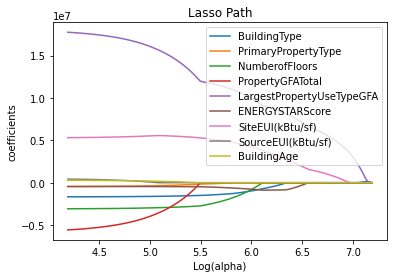

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path

# Standardize the predictor data
predictors_data_standardised = predictors_data / predictors_data.std(axis=0)

# Compute the Lasso path with different alpha values
alphas_lasso, coefs_lasso, _ = lasso_path(predictors_data_standardised, response_data)

# Convert alphas to logarithmic scale
log_alphas_lasso = np.log10(alphas_lasso)

# Transpose the coefs_lasso array
coefs_lasso_transposed = coefs_lasso.T

# Plot the Lasso path for each coefficient
for i in range(coefs_lasso_transposed.shape[1]):
    plt.plot(log_alphas_lasso, coefs_lasso_transposed[:, i], label=predictors_data.columns.values[i])

# Set labels, title, and axis for the plot
plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.legend()
plt.axis('tight')

# Show the plot
plt.show()

By comparing the magnitude of the coefficients, LargestPropertyUseTypeGFA has the largest effect on the target variable of all the predictor variables. siteEUI(kBtu/sf), PropertyGFATotal, NumberofFloors have a more significant effect on energy consumption, while the other variables do not have a significant effect on energy consumption. The other variables have little effect on energy consumption.
BuildingType, PrimaryPropertyType, NumberofFloors, PropertyGFATotal and SiteEnergyUse(kBtu) have a negative relationship, LargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEUI(kBtu/sf), SourceEUI(kBtu/sf), and BuildingAge are positively correlated.

### Decision Trees

Next we use a decision tree model and compare the resulting results with multiple linear regression to arrive at a more appropriate model.

In [134]:
#Use dummy (single heat) coding for these variables
building_energy_new = pd.get_dummies(building_energy_new, columns=['BuildingType', 'PrimaryPropertyType'])
print(building_energy_new.head())

   NumberofFloors  PropertyGFATotal  LargestPropertyUseTypeGFA  \
0              12             88434                    88434.0   
1              11            103566                    83880.0   
2              41            956110                   756493.0   
3              10             61320                    61320.0   
4              18            175580                   123445.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
0             60.0         81.699997          182.500000            7226362.5   
1             61.0         94.800003          176.100006            8387933.0   
2             43.0         96.000000          241.899994           72587024.0   
3             56.0        110.800003          216.199997            6794584.0   
4             75.0        114.800003          211.399994           14172606.0   

   BuildingAge  BuildingType_0  BuildingType_1  ...  PrimaryPropertyType_10  \
0           89               0       

In [135]:
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree regressor with a random state of 0
reg_tree = DecisionTreeRegressor(random_state=0)
# Fit the decision tree model on the training data
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [136]:
# Predict the target variable using the test data
y_pred = reg_tree.predict(X_test)

# Calculate the performance metrics of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 98135711687691.7
Mean Absolute Error: 1077682.102889328
R2 Score: 0.5257445172748048


Hyperparameter tuning and cross-validation are used below to improve model performance and prevent over-fitting.

In [137]:
# Define the grid of hyperparameters for the decision tree model
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30, 40],
    'min_samples_leaf': [1, 5, 10, 20]
}

# Perform grid search cross-validation to find the best hyperparameters for the decision tree model
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=0), param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


### CART

The code provided creates, fits, and evaluates the optimal decision tree model using the best parameters found during hyperparameter tuning.

In [138]:
# Create and fit the optimal decision tree model using the best parameters
optimal_reg_tree = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split= 10, random_state=0)
optimal_reg_tree.fit(X_train, y_train)

# Predict the target variable using the test data
y_pred_optimal = optimal_reg_tree.predict(X_test)

# Calculate the performance metrics for the optimal model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
mae_optimal = mean_absolute_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)

# Print the performance metrics
print(f"Optimal Mean Squared Error: {mse_optimal}")
print(f"Optimal Mean Absolute Error: {mae_optimal}")
print(f"Optimal R2 Score: {r2_optimal}")

Optimal Mean Squared Error: 80209603022047.16
Optimal Mean Absolute Error: 1058248.0619671845
Optimal R2 Score: 0.6123751145609895


The optimal MSE is lower than the previous MSE, indicating that the model's performance has improved after hyperparameter tuning.The optimal MAE is slightly lower than the previous MAE, which indicates that the average absolute difference between the predicted and actual values has decreased after hyperparameter tuning. This means that the model's predictions are now closer to the true values.The best R2 score is 0.6123751145609895, which means that the decision tree model explains approximately 61.2% of the variance in the target variable (SiteEnergyUse(kBtu)). This can be interpreted as a relatively good fit, as it shows that the model has captured a significant portion of the underlying patterns in the data.

In [139]:
from sklearn.tree import export_text

# Text representation 
text_representation = export_text(optimal_reg_tree, feature_names=list(X.columns))
print(text_representation)

|--- LargestPropertyUseTypeGFA <= 750027.50
|   |--- PropertyGFATotal <= 213425.00
|   |   |--- SiteEUI(kBtu/sf) <= 85.75
|   |   |   |--- LargestPropertyUseTypeGFA <= 73868.00
|   |   |   |   |--- SiteEUI(kBtu/sf) <= 41.45
|   |   |   |   |   |--- LargestPropertyUseTypeGFA <= 39732.50
|   |   |   |   |   |   |--- SiteEUI(kBtu/sf) <= 28.85
|   |   |   |   |   |   |   |--- SiteEUI(kBtu/sf) <= 18.30
|   |   |   |   |   |   |   |   |--- SiteEUI(kBtu/sf) <= 10.30
|   |   |   |   |   |   |   |   |   |--- SiteEUI(kBtu/sf) <= 7.30
|   |   |   |   |   |   |   |   |   |   |--- SiteEUI(kBtu/sf) <= 3.55
|   |   |   |   |   |   |   |   |   |   |   |--- value: [46560.40]
|   |   |   |   |   |   |   |   |   |   |--- SiteEUI(kBtu/sf) >  3.55
|   |   |   |   |   |   |   |   |   |   |   |--- value: [135675.78]
|   |   |   |   |   |   |   |   |   |--- SiteEUI(kBtu/sf) >  7.30
|   |   |   |   |   |   |   |   |   |   |--- value: [223732.18]
|   |   |   |   |   |   |   |   |--- SiteEUI(kBtu/sf) >  10.30
| 

The optimal MSE is lower than the previous MSE, indicating that the model's performance has improved after hyperparameter tuning.The optimal MAE is slightly lower than the previous MAE, which indicates that the average absolute difference between the predicted and actual values has decreased after hyperparameter tuning. This means that the model's predictions are now closer to the true values.The best R2 score is 0.6123751145609895, which means that the decision tree model explains approximately 61.2% of the variance in the target variable (SiteEnergyUse(kBtu)). This can be interpreted as a relatively good fit, as it shows that the model has captured a significant portion of the underlying patterns in the data.

## Results

In this study, three models—linear regression, decision tree, and Lasso regression—yielded varying results. The linear regression model had an R-squared value of 0.590, accounting for 59% of the dependent variable's variance. It identified the largest property use type GFA, site EUI, and number of floors as the most influential independent variables. The decision tree model had a higher R-squared value of 0.612, accounting for 61% of the variance. It identified the largest property use type GFA, site EUI, and building type as the most influential independent variables. The Lasso regression model showed the influence of each independent variable and identified the largest property use type GFA, site EUI, and building age as the most influential factors.

The largest property use type GFA consistently emerged as the most influential variable in both linear regression and Lasso models. Site EUI and the number of floors were influential in the linear regression model, while building type was influential in the decision tree model. The Lasso regression model also identified building age as an influential variable. These results suggest prioritizing energy efficiency improvements in large buildings to reduce energy consumption. The findings emphasize the importance of considering different independent variables in energy consumption models and identifying the most influential factors to inform energy efficiency policy and building design.

## Discussion

The three methods used in this study, namely Ordinary Least Squares (OLS), Lasso and Decision Trees, all have their own strengths and limitations.
OLS is a classical linear regression model that provides a simple and interpretable way to model the relationship between variables. However, OLS assumes that the relationship between the independent and dependent variables is linear and additive, which may not always be the case in practice. Lasso, on the other hand, is a powerful feature selection tool that can effectively handle high-dimensional data. It works by applying a penalty to the magnitude of the coefficients, thus forcing some of them to be exactly zero, effectively removing the corresponding features from the model. However, the choice of penalty parameters is often difficult and can significantly affect the performance of the model. Finally, a decision tree is a non-parametric model that captures the complex interactions and non-linear relationships between variables. It is also easy to interpret and can handle missing values and outliers well. However, decision trees can be over-fitted and are sensitive to small changes in the training data. In general, each method has its own advantages and disadvantages.

## Conclusion

Based on the results of this study, it can be concluded that the use of different modelling techniques can have a significant impact on the accuracy and interpretability of energy consumption predictions for buildings. In particular, the use of machine learning algorithms such as lassoes and decision trees can provide new insights into the extent to which different independent variables affect the dependent variable.

In addition, this analysis highlights the importance of considering a range of factors when predicting energy consumption in buildings. The analysisj results have important implications for building energy management as they can be used to optimise energy use and reduce costs. For example, building managers can use the results of this study to identify the key factors affecting energy consumption and prioritise energy efficiency measures accordingly. In addition, policy makers can use the findings to inform the development of energy efficiency policies and regulations.

Overall, this study highlights the potential impact of using a range of modelling techniques and considering a range of building factors when f analysing energy consumption in buildings. By doing so, building managers and policy makers can make more informed decisions about energy management, reduce a building's n energy consumption and carbon emissions, and contribute to a more sustainable future.

***（ 1965 Word ）***

## References

Deng, S.-M. and Burnett, J. (2000). A study of energy performance of hotel buildings in Hong Kong. Energy and Buildings, 31(1), pp.7–12. doi:https://doi.org/10.1016/s0378-7788(98)00067-x.

Mallory-Hill, S., Preiser, W.F.E. and Watson, C. (2012). Enhancing building performance. Chichester, West Sussex ; Ames, Iowa: Wiley-Blackwell.

Rode, P., Keim, C., Robazza, G., Viejo, P. and Schofield, J. (2014). Cities and Energy: Urban Morphology and Residential Heat-Energy Demand. Environment and Planning B: Planning and Design, 41(1), pp.138–162. doi:https://doi.org/10.1068/b39065.

Royal Institution of Chartered Surveyors. (2005). Green Value: Green Buildings, Growing Assets.

## Appendix

Datasets：https://raw.githubusercontent.com/Yuying-Zeng/Data-Science-For-Spatial-Systemes/main/2016_Building_Energy_Benchmarking.csv

Data sources：https://dev.socrata.com/foundry/data.seattle.gov/2bpz-gwpy